**Ejercicio 1 - EDA (Exporatory Data Analysis) Python**

Trabajaremos con datos sobre "Multas de circulación":infracciones que han cometido los conductores en la ciudad de Madrid.
Para nuestro análisis, tomaremos el último año completo disponible, en esta ocasión todo 2021.En el link :

https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=fb9a498a6bdb9410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default

podemos ver una descripción detallada de la información que contienen los datos, en nuestro caso tenemos información de todas las multas de circulación que el Ayuntamiento de Madrid tramita cada mes. Por motivos referentes a protección de datos las variables informan únicamente de la infracción y está prohibido realizar labores de re-identificación personal de la información de los infractores.

Para nuestro caso de estudio sólo vamos a descargar los archivos con extensión .csv que provengan de la categoría "Detalle" del año 2021.

Como hemos visto el dataframe contiene 14 variables que tienen el siguiente significado:

-**CALIFICACION**: Importancia o gravedad dela infracción cometida\
-**LUGAR**: Localización en la que se produjo la infracción\
-**MES + ANIO + HORA**: Fecha en la que el conductor fue sancionado\
-**IMP_BOL**: Importe de la sanción\
-**DESCUENTO**: Reducción sobre el precio dela infracción (50% - Siempre que se pague en el plazo de tiempo establecido en\                 la Ley de Seguridad Vial), si se considera que pueda tener reducción\
-**PUNTOS**: Número de puntos que acarrea la sanción sobre el carnet de conducir del infractor\
-**DENUNCIANTE**: Agente del organismo público encargado de la regulación de la circulación de la Comunidad de Madrid que\                     impone la denuncia al infractor\
-**HECHO_BOL**: Motivo o causa por la que el conductor es sancionado\
-**VEL_LIMITE**: Velocidad máxima permitida dela vía por la que el conductor transitaba al realizar la infracción\
-**VEL_CIRCULA**: Velocidad a la que el conductor transitaba la vía en la que ha sido sancionado\
-**COORDENADA_X**: Punto geográfico (X) que identifica al infractor en infracciones derivadas de rebasar un semáforo en                        fase roja, no respetar las señales en una vía de circulación restringida, o reservadas o acceder a     Madrid Central sin autorización\
-**COORDENADA_Y**: Punto geográfico (Y) que identifica al infractor en infracciones derivadas de rebasar un semáforo en                        fase roja, no respetar las señales en una vía de circulación restringida o reservadas o acceder a Madrid   Central sin autorización


**OBJETIVOS**

**1. Une los doce dataframe desde Enero a Diciembre en un único dataframe. Muestra el shape total del dataframe resultante.**

In [1]:
# En primer lugar importamos las librerias necesarias para poder desarrollar la práctica

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotnine 
from plotnine import *
from plotnine import ggplot, aes, geom_point

In [3]:
# Descargo los archivos csv del link indicado y los guardo en la misma carpeta que este nooteboock.
# Como se indica en la pista, creamos una lista vacía, con el objetivo de que cada elemento de la lista cada uno de
# nuetros archivos csv en forma de dataframe. Para ello hacemos el bucle for. 

In [4]:
df = pd.DataFrame()

In [5]:
# El bucle tendrá dos partes ya que por un lado están los meses 01,02..,09 y por otro 10,11 y 12. 

In [6]:
lista_csv_multas = [] 

for i in range(1,13):
    if i<10:
        
        data = pd.read_csv(str("20210")+str(i)+str("_detalle.csv"), delimiter= ";", encoding = "latin1", header=0,\
              names= ["CALIFICACION","LUGAR","MES","ANIO","HORA","IMP_BOL","DESCUENTO","PUNTOS","DENUNCIANTE","HECHO-BOL",\
                     "VEL_LIMITE","VEL_CIRCULA","COORDENADA-X","COORDENADA-Y"])
        
        print("leyendo archivo: ",str("20210")+str(i)+str("_detalle.csv"))
        lista_csv_multas.append(data)
    else:
        
        data = pd.read_csv(str("2021")+str(i)+str("_detalle.csv"), delimiter= ";", encoding = "latin1", header=0,\
              names= ["CALIFICACION","LUGAR","MES","ANIO","HORA","IMP_BOL","DESCUENTO","PUNTOS","DENUNCIANTE","HECHO-BOL",\
                     "VEL_LIMITE","VEL_CIRCULA","COORDENADA-X","COORDENADA-Y"])
        
        print("leyendo archivo: ",str("20210")+str(i)+str("_detalle.csv"))
        lista_csv_multas.append(data)
    
  
  

leyendo archivo:  202101_detalle.csv
leyendo archivo:  202102_detalle.csv
leyendo archivo:  202103_detalle.csv
leyendo archivo:  202104_detalle.csv
leyendo archivo:  202105_detalle.csv
leyendo archivo:  202106_detalle.csv
leyendo archivo:  202107_detalle.csv
leyendo archivo:  202108_detalle.csv
leyendo archivo:  202109_detalle.csv
leyendo archivo:  2021010_detalle.csv
leyendo archivo:  2021011_detalle.csv
leyendo archivo:  2021012_detalle.csv


In [7]:
type(lista_csv_multas)

list

In [8]:
#Comprobamos que la lista contiene 12 elementos: los 12 dataframe, 1 por cada mes del año

In [9]:
len(lista_csv_multas)

12

In [10]:
lista_csv_multas

[       CALIFICACION                                     LUGAR  MES  ANIO  \
 0        GRAVE       104 FCO PI Y MARGALL ESQ ANA A              1  2021   
 1        GRAVE       104 FCO PI Y MARGALL ESQ ANA A              1  2021   
 2        LEVE        PO LA HABANA 17                             1  2021   
 3        LEVE        PLAZA PLATERIA DE MARTINEZ 1                1  2021   
 4        LEVE        CALLE SAN BERNARDO 91                       1  2021   
 ...             ...                                       ...  ...   ...   
 134607   LEVE        RAIMUNDO FERNANDEZ VILLAVERDE               1  2021   
 134608   GRAVE       MAJUELO SN                                  1  2021   
 134609   GRAVE       ABADA FR 14                                 1  2021   
 134610   MUY GRAVE   MENDEZ ALVARO-TITAN                         1  2021   
 134611   LEVE        RAVENA-SARRE                                1  2021   
 
          HORA  IMP_BOL DESCUENTO  PUNTOS           DENUNCIANTE  \
 0     

In [11]:
#Comprobamos que cada elemento de la lista es un dataframe lista_csv_multas[0], lista_csv_multas[1]...lista_csv_multas[12]

In [12]:
type(lista_csv_multas[0])

pandas.core.frame.DataFrame

In [13]:
#Ahora podemos comprobar también elemento por elemento si está bien descargado, por ejemplo:

In [14]:
lista_csv_multas[11]

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA-X,COORDENADA-Y
0,LEVE,CL SORIA 3,12,2021,13.57,30.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN EN LUGAR HABILITAD...,,,,
1,LEVE,CL PEÑUELAS 16,12,2021,9.32,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO. VEHÍCULO DE CAT...,,,,
2,LEVE,CL PEÑUELAS 5,12,2021,9.36,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
3,LEVE,CL LAUREL 4,12,2021,10.03,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
4,LEVE,CL MORATINES 11,12,2021,11.22,90.0,SI,0,SER,ESTACIONAR EN ZONA Y HORARIO DE CARGA Y DESCAR...,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193613,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,21.24,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,77,,
193614,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,21.36,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,75,,
193615,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,21.37,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,78,,
193616,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,23.11,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,79,,


In [15]:
#Al principio pensé en esto, pero no me pareció nada optimizado.

#multas2021=pd.concat([lista_csv_multas[0],lista_csv_multas[1],lista_csv_multas[2],lista_csv_multas[3],\
            #lista_csv_multas[4],lista_csv_multas[5],lista_csv_multas[6],lista_csv_multas[7],\
            #lista_csv_multas[8],lista_csv_multas[9],lista_csv_multas[10],lista_csv_multas[11]],\
            #axis = 0, join = "inner", ignore_index = True)

 Como tuve tiempo, estudié la página recomendada en clase, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html, y escribí mejor el siguiente bucle for

In [16]:
multas2021 = pd.concat([lista_csv_multas[i] for i in range(0, len(lista_csv_multas))],\
        axis= 0, join="inner", ignore_index= True)

In [17]:
multas2021

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA-X,COORDENADA-Y
0,GRAVE,104 FCO PI Y MARGALL ESQ ANA A,1,2021,19.45,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,,444180.30,4482686.90
1,GRAVE,104 FCO PI Y MARGALL ESQ ANA A,1,2021,19.51,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,,444180.30,4482686.90
2,LEVE,PO LA HABANA 17,1,2021,13.32,90.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACIÓN. ...,,,,
3,LEVE,PLAZA PLATERIA DE MARTINEZ 1,1,2021,21.24,90.0,SI,0,AGENTES DE MOVILIDAD,ACCEDER A MADRID CENTRAL SIN AUTORIZACIÓN. ...,,,441141.16,4473777.50
4,LEVE,CALLE SAN BERNARDO 91,1,2021,1.05,90.0,SI,0,AGENTES DE MOVILIDAD,ACCEDER A MADRID CENTRAL SIN AUTORIZACIÓN. ...,,,440099.56,4475625.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013617,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,21.24,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,77,,
2013618,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,21.36,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,75,,
2013619,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,21.37,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,78,,
2013620,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,23.11,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,79,,


In [18]:
#Ahora ya con el Dataframe puedo hacer una descripción general, sacar parámetros estadísticos (sólo para variables
# numéricas, ver el tipo de cada variable, obtener el nombre de las columnas...)

In [19]:
multas2021.describe()

,MES,ANIO,HORA,IMP_BOL,PUNTOS
count,2.013622e+06,2013622.0,2.013622e+06,2.013622e+06,2.013622e+06
mean,6.350154e+00,2021.0,1.393381e+01,9.747196e+01,2.167433e-01
std,3.506038e+00,0.0,4.426484e+00,6.754210e+01,9.026384e-01
min,1.000000e+00,2021.0,0.000000e+00,3.000000e+01,0.000000e+00
25%,3.000000e+00,2021.0,1.050000e+01,9.000000e+01,0.000000e+00
50%,6.000000e+00,2021.0,1.345000e+01,9.000000e+01,0.000000e+00
75%,1.000000e+01,2021.0,1.737000e+01,1.000000e+02,0.000000e+00
max,1.200000e+01,2021.0,2.359000e+01,1.000000e+03,6.000000e+00


In [20]:
multas2021.describe().loc["std"]

MES         3.506038
ANIO        0.000000
HORA        4.426484
IMP_BOL    67.542103
PUNTOS      0.902638
Name: std, dtype: float64

In [21]:
multas2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013622 entries, 0 to 2013621
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   CALIFICACION  object 
 1   LUGAR         object 
 2   MES           int64  
 3   ANIO          int64  
 4   HORA          float64
 5   IMP_BOL       float64
 6   DESCUENTO     object 
 7   PUNTOS        int64  
 8   DENUNCIANTE   object 
 9   HECHO-BOL     object 
 10  VEL_LIMITE    object 
 11  VEL_CIRCULA   object 
 12  COORDENADA-X  object 
 13  COORDENADA-Y  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 215.1+ MB


In [22]:
# Hacemos una copia del dataframe original para trabajar con ella. 

In [23]:
multas2021_copia = multas2021.copy()

In [24]:
multas2021_copia.columns

Index(['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO',
       'PUNTOS', 'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA',
       'COORDENADA-X', 'COORDENADA-Y'],
      dtype='object')

**2. Como tal, no vamos a trabajar con datos geográficos, borra las columnas COORDENADA_X y COORDENADA_Y.**

In [25]:
#Lo primero que hacemos es eliminar los espacios en blanco en todo el df para evitar posibles errores 
# en nuestras operaciones

In [26]:
multas2021_copia.columns = multas2021_copia.columns.str.strip()

In [27]:
# Ahora eliminamos las columnas que nos piden 

In [28]:
multas2021_copia = multas2021_copia.drop(['COORDENADA-X', 'COORDENADA-Y'], axis = 1)

In [91]:
multas2021_copia.head(5)

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIF_VEL
0,GRAVE,104 FCO PI Y MARGALL ESQ ANA A,1,2021,19,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
1,GRAVE,104 FCO PI Y MARGALL ESQ ANA A,1,2021,19,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
23,GRAVE,100 FRANCISCO SILVELA 62,1,2021,8,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
26,GRAVE,118 MONFORTE DE LEMOS - FINIST,1,2021,8,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
36,GRAVE,122 AV. PESETA - CTRA BARRIO F,1,2021,8,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0


In [30]:
multas2021_copia.columns

Index(['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO',
       'PUNTOS', 'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA'],
      dtype='object')

In [31]:
multas2021_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013622 entries, 0 to 2013621
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   CALIFICACION  object 
 1   LUGAR         object 
 2   MES           int64  
 3   ANIO          int64  
 4   HORA          float64
 5   IMP_BOL       float64
 6   DESCUENTO     object 
 7   PUNTOS        int64  
 8   DENUNCIANTE   object 
 9   HECHO-BOL     object 
 10  VEL_LIMITE    object 
 11  VEL_CIRCULA   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 184.4+ MB


**3. Revisa los valores únicos de las variables, hay algunas de ellas que no tienen valores únicos por lo que son constantes ¿merece la pena tenerlas en el dataframe?**

Los valores constantes no son necesarios en un df, como es el caso del año.

In [32]:
multas2021_copia['CALIFICACION'].unique()

array(['GRAVE     ', 'LEVE      ', 'MUY GRAVE '], dtype=object)

In [33]:
multas2021_copia['LUGAR'].unique()

array(['104 FCO PI Y MARGALL ESQ ANA A          ',
       'PO LA HABANA 17                         ',
       'PLAZA PLATERIA DE MARTINEZ 1            ', ...,
       'ENTREVIAS 44                            ',
       'SANTA ENGRACIA 6                        ',
       'M 30 KM 5,400 LATERAL C 1               '], dtype=object)

In [34]:
multas2021_copia['MES'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [35]:
multas2021_copia['ANIO'].unique()

array([2021], dtype=int64)

In [36]:
multas2021_copia['HORA'].unique()

array([19.45, 19.51, 13.32, ...,  4.37,  3.53,  4.23])

In [37]:
multas2021_copia['IMP_BOL'].unique()

array([ 200.,   90.,   60.,  500.,   30., 1000.,  100.,  400.,  300.,
         50.])

In [38]:
multas2021_copia['DESCUENTO'].unique()

array(['SI', 'NO'], dtype=object)

In [39]:
multas2021_copia['PUNTOS'].unique()

array([4, 0, 6, 3, 2], dtype=int64)

In [40]:
multas2021_copia['DENUNCIANTE'].unique()

array(['AGENTES DE MOVILIDAD', 'SER                 ',
       'POLICIA MUNICIPAL   ', 'SACE                '], dtype=object)

In [41]:
multas2021_copia['HECHO-BOL'].unique()

array(['REBASAR UN SEMÁFORO EN FASE ROJA.                                                                                            ',
       'ESTACIONAR EN CARRIL DE CIRCULACIÓN.                                                                                         ',
       'ACCEDER A MADRID CENTRAL SIN AUTORIZACIÓN.                                                                                   ',
       ...,
       'CONDUCCION NEGLIGENTE: CIRCULA EN ZIG ZAG HASTA PARAR EL VHO ATRAVESANDO TRANSV                                              ',
       'CONDUCCION NEGLIGENTE: EL CONDUCTOR ES INCAPAZ DE HACERSE CON LOS MANDOS VHO                                                 ',
       'CONDUCCION TEMERARIA: INVADE UN CARRIL POR DONDE CIRCULA AGENTE CON MOTOCICLET                                               '],
      dtype=object)

In [42]:
multas2021_copia['VEL_LIMITE'].unique()

array(['   ', '70', '50', '90', '60', '40', '80', '30', '20'],
      dtype=object)

In [43]:
multas2021_copia['VEL_CIRCULA'].unique()

array(['   ', '138', '140', '131', '61', '69', '90', '63', '64', '66',
       '72', '68', '65', '76', '62', '71', '67', '70', '85', '79', '91',
       '78', '77', '95', '96', '92', '83', '88', '75', '87', '81', '123',
       '98', '84', '74', '105', '104', '82', '94', '80', '110', '89',
       '97', '103', '107', '114', '86', '99', '100', '102', '60', '106',
       '130', '101', '109', '122', '117', '115', '128', '93', '111',
       '116', '120', '119', '108', '137', '113', '73', '136', '112',
       '125', '144', '129', '149', '158', '126', '154', '118', '124',
       '121', '127', '135', '134', '148', '132', '157', '133', '151',
       '58', '55', '59', '56', '57', '146', '139', '54', '53', '42', '46',
       '45', '41', '52', '44', '51', '47', '50', '43', '48', '40', '49',
       '159', '152', '155', '143', '145', '141', '156', '142', '153',
       '147', '32', '31', '30', '33', '39', '35', '37', '38', '160',
       '150', '36', '34'], dtype=object)

**4. Parece que las columnas VEL_LIMITE y, VEL_CIRCULA tienen valores vacíos, esto se debe a que, si la infracción no se produjo por rebasar ningún límite de velocidad, este valor aparece vacío, cambia todas las anomalías que detectes por nulo. Pista: Investiga cómo emplear con regex una expresión regular como r'^\s*$' en la función replace.**

In [44]:
multas2021_copia = multas2021_copia.replace(r'^\s*$', "NaN", regex=True)

In [92]:
multas2021_copia.head(10)

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIF_VEL
0,GRAVE,104 FCO PI Y MARGALL ESQ ANA A,1,2021,19,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
1,GRAVE,104 FCO PI Y MARGALL ESQ ANA A,1,2021,19,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
23,GRAVE,100 FRANCISCO SILVELA 62,1,2021,8,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
26,GRAVE,118 MONFORTE DE LEMOS - FINIST,1,2021,8,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
36,GRAVE,122 AV. PESETA - CTRA BARRIO F,1,2021,8,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
42,GRAVE,112 ASCAO - EMILIO FERRARI,1,2021,9,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
59,GRAVE,116 VIA LUSITANA - PL ELIPTICA,1,2021,9,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
61,GRAVE,090 AV ILUSTRACION ESQ BETANZO,1,2021,13,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
72,GRAVE,105 FTE CARRANTONA ESQ HAC.PAV,1,2021,14,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
76,GRAVE,110 AV MARQUES DE CORBERA - RI,1,2021,9,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0


**5. Las dos columnas VEL_LIMITE y, VEL_CIRCULA pese a ser dos columnas puramente numéricas, se reconocen como tipo "object", revisa la frecuencia de valores, verás que se cuentan como cadenas de texto, por lo tanto:
- Cambia los nulos de las dos variables por 0
- Cambia el tipo de la variable a numérico 
- ¿Cuál es la velocidad límite más repetida distinto de cero?

In [46]:
# Una vez hemos transformado los valores "   " por nulos (NaN), ahora los cambiamos por ceros y comprobamos

In [47]:
multas2021_copia= multas2021_copia.replace("NaN",0)

In [48]:
multas2021_copia

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA
0,GRAVE,104 FCO PI Y MARGALL ESQ ANA A,1,2021,19.45,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0
1,GRAVE,104 FCO PI Y MARGALL ESQ ANA A,1,2021,19.51,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0
2,LEVE,PO LA HABANA 17,1,2021,13.32,90.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACIÓN. ...,0,0
3,LEVE,PLAZA PLATERIA DE MARTINEZ 1,1,2021,21.24,90.0,SI,0,AGENTES DE MOVILIDAD,ACCEDER A MADRID CENTRAL SIN AUTORIZACIÓN. ...,0,0
4,LEVE,CALLE SAN BERNARDO 91,1,2021,1.05,90.0,SI,0,AGENTES DE MOVILIDAD,ACCEDER A MADRID CENTRAL SIN AUTORIZACIÓN. ...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2013617,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,21.24,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,77
2013618,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,21.36,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,75
2013619,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,21.37,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,78
2013620,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,23.11,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,79


In [49]:
multas2021_copia['VEL_LIMITE'].unique()

array([0, '70', '50', '90', '60', '40', '80', '30', '20'], dtype=object)

In [50]:
#Cambiamos a variable entera 

In [51]:
multas2021_copia[["VEL_LIMITE","VEL_CIRCULA"]] = multas2021_copia[["VEL_LIMITE","VEL_CIRCULA"]].astype(int)

In [52]:
multas2021_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013622 entries, 0 to 2013621
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   CALIFICACION  object 
 1   LUGAR         object 
 2   MES           int64  
 3   ANIO          int64  
 4   HORA          float64
 5   IMP_BOL       float64
 6   DESCUENTO     object 
 7   PUNTOS        int64  
 8   DENUNCIANTE   object 
 9   HECHO-BOL     object 
 10  VEL_LIMITE    int32  
 11  VEL_CIRCULA   int32  
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 169.0+ MB


In [53]:
multas2021_copia["VEL_LIMITE"]

0           0
1           0
2           0
3           0
4           0
           ..
2013617    70
2013618    70
2013619    70
2013620    70
2013621    70
Name: VEL_LIMITE, Length: 2013622, dtype: int32

In [54]:
# Ahora en el drecribe del df también sadrán estas dos columnas ahora que son variables enteras.

In [55]:
multas2021_copia.describe()

,MES,ANIO,HORA,IMP_BOL,PUNTOS,VEL_LIMITE,VEL_CIRCULA
count,2.013622e+06,2013622.0,2.013622e+06,2.013622e+06,2.013622e+06,2.013622e+06,2.013622e+06
mean,6.350154e+00,2021.0,1.393381e+01,9.747196e+01,2.167433e-01,1.495140e+01,1.721855e+01
std,3.506038e+00,0.0,4.426484e+00,6.754210e+01,9.026384e-01,2.954662e+01,3.392934e+01
min,1.000000e+00,2021.0,0.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,2021.0,1.050000e+01,9.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,2021.0,1.345000e+01,9.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+01,2021.0,1.737000e+01,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+01,2021.0,2.359000e+01,1.000000e+03,6.000000e+00,9.000000e+01,1.600000e+02


In [56]:
# Vemos por cada valor único el número de veces que se repite  

In [57]:
multas2021_copia["VEL_LIMITE"].value_counts() 

0     1591715
70     280182
90      85239
50      44692
40       3425
60       3390
30       2931
80       1972
20         76
Name: VEL_LIMITE, dtype: int64

In [58]:
# Otra forma de verlo, esta vez en frecuencia %, el valor 0 es un 79 %, altísimo.

**La velocidad límite que más se repite es 70 Km/hora**

In [59]:
multas2021_copia["VEL_LIMITE"].value_counts()/len(multas2021_copia) * 100

0     79.047358
70    13.914330
90     4.233118
50     2.219483
40     0.170092
60     0.168353
30     0.145559
80     0.097933
20     0.003774
Name: VEL_LIMITE, dtype: float64

**6. Genera una nueva columna llamada DIFERENCIA_KMH que sea el resultado de restar a cada valor de la velocidad a la que circulaba el conductor la velocidad límite en la que se produce la infracción, obtén un top 10 de los conductores que rebasaron los límites a mayor velocidad.**

In [60]:
# Hacemos la columna nueva de diferencia de velocidades y comprobamos

In [61]:
multas2021_copia["DIF_VEL"]= round(multas2021_copia["VEL_CIRCULA"]- multas2021_copia["VEL_LIMITE"],2)

In [62]:
multas2021_copia

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIF_VEL
0,GRAVE,104 FCO PI Y MARGALL ESQ ANA A,1,2021,19.45,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
1,GRAVE,104 FCO PI Y MARGALL ESQ ANA A,1,2021,19.51,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
2,LEVE,PO LA HABANA 17,1,2021,13.32,90.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACIÓN. ...,0,0,0
3,LEVE,PLAZA PLATERIA DE MARTINEZ 1,1,2021,21.24,90.0,SI,0,AGENTES DE MOVILIDAD,ACCEDER A MADRID CENTRAL SIN AUTORIZACIÓN. ...,0,0,0
4,LEVE,CALLE SAN BERNARDO 91,1,2021,1.05,90.0,SI,0,AGENTES DE MOVILIDAD,ACCEDER A MADRID CENTRAL SIN AUTORIZACIÓN. ...,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013617,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,21.24,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,77,7
2013618,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,21.36,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,75,5
2013619,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,21.37,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,78,8
2013620,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,23.11,100.0,SI,0,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,79,9


In [63]:
# Ahora vemos el top 10

In [64]:
multas2021_copia.sort_values(by="DIF_VEL", ascending=False).head(10)

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIF_VEL
931038,GRAVE,"M 30 KM 6,700 CR 3 C 1",6,2021,1.29,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
610744,GRAVE,"M 30 KM 0,500 CALZADA 1",4,2021,1.41,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
407383,GRAVE,M 30 XC KM 16 CARRIL 1,3,2021,23.39,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,140,70
45812,GRAVE,"M 30 FTE KM 4,150 CR 4",1,2021,19.02,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,140,70
1508471,GRAVE,M 30 KM 27 CALZADA 2,10,2021,0.40,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,159,69
192421,GRAVE,M 30 KM 27 CR 2 CALZADA 2,2,2021,1.32,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,159,69
610743,GRAVE,AV PUERTA DE HIERRO F 2,4,2021,1.07,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,80,149,69
771374,GRAVE,"M 30 FTE KM 04,15 CR 4",5,2021,21.38,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,138,68
1258522,GRAVE,"M-30 C-1 KM 6,700 CR3",8,2021,4.34,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,158,68
407384,GRAVE,"M 30 XC KM 16,53 CR 4",3,2021,2.50,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,138,68


In [65]:
# Vemos que el valor más repetido es rebasar la velocidad permitida en 5 Km/hora 

In [66]:
(multas2021_copia.DIF_VEL.value_counts()/len(multas2021_copia) * 100).head(10)

0     79.047358
5      2.521029
4      2.237560
6      2.178860
7      1.894099
8      1.392168
9      1.284501
10     1.154934
11     1.143958
12     0.867243
Name: DIF_VEL, dtype: float64

**7. Obtén un dataframe filtrado por todas las denuncias que hayan acarreado retirada de puntos (es decir, puntos distintos de cero). Agrupa el dataframe filtrado por el agente público que emite la denuncia, ¿cuál de todos los agentes públicos tiene una mayor media de retirada de puntos?**

In [67]:
multas2021_copia = multas2021_copia[multas2021_copia.PUNTOS != 0]

In [68]:
multas2021_copia

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIF_VEL
0,GRAVE,104 FCO PI Y MARGALL ESQ ANA A,1,2021,19.45,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
1,GRAVE,104 FCO PI Y MARGALL ESQ ANA A,1,2021,19.51,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
23,GRAVE,100 FRANCISCO SILVELA 62,1,2021,8.29,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
26,GRAVE,118 MONFORTE DE LEMOS - FINIST,1,2021,8.45,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
36,GRAVE,122 AV. PESETA - CTRA BARRIO F,1,2021,8.52,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012780,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,22.37,300.0,SI,2,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,103,33
2012988,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,7.43,300.0,SI,2,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,107,37
2013141,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,9.16,300.0,SI,2,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,104,34
2013251,GRAVE,"M-30 CALZADA 1 KM 19,800",12,2021,10.54,300.0,SI,2,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,111,41


In [69]:
# Ahora con un group by y un conteo vemos los agentes denunciantes que más puntos retiran

In [70]:
multas2021_copia.groupby(["DENUNCIANTE"]).count()["PUNTOS"]

DENUNCIANTE
AGENTES DE MOVILIDAD    78198
POLICIA MUNICIPAL       38185
Name: PUNTOS, dtype: int64

**Los agentes de movilidad son los que más puntos retiran**

In [71]:
#Podemos también calcular media de puntos retirados por agentes

In [72]:
multas2021_copia.groupby(["DENUNCIANTE"]).mean()["PUNTOS"]

DENUNCIANTE
AGENTES DE MOVILIDAD    3.937684
POLICIA MUNICIPAL       3.365720
Name: PUNTOS, dtype: float64

**8. De la columna hora elimina la parte decimal, muestra de forma gráfica en qué horas se han producido más multas.**

In [73]:
#Primero cambiamos la variable a entero y después comprobamos 

In [74]:
multas2021_copia["HORA"] = multas2021_copia["HORA"].astype(int)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_880/2358578510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [75]:
multas2021_copia["HORA"]

0          19
1          19
23          8
26          8
36          8
           ..
2012780    22
2012988     7
2013141     9
2013251    10
2013323     0
Name: HORA, Length: 116383, dtype: int32

In [76]:
# Comproamos con longitud de valores çunicos que horas en valor entero deben ser 24

In [77]:
len(multas2021_copia['HORA'].unique())

24

In [78]:
#Ahora con matplotlib hacemos el histograma. Eje x = horas del día y el el eje y = número de infracciones (todo el 
# año 2021)

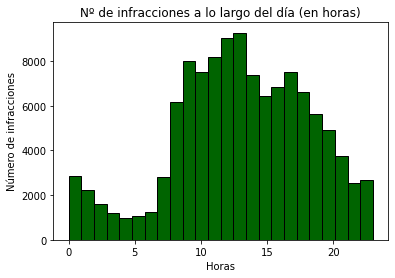

In [79]:
plt.hist(multas2021_copia['HORA'], bins =24, color='darkgreen', edgecolor='black')
lista_axis = [0,24,0,9000]
plt.title("Nº de infracciones a lo largo del día (en horas)")
plt.xlabel("Horas")
plt.ylabel("Número de infracciones")
plt.show()

**9. Muestra de forma gráfica y numérica el número de infracciones (sin frecuencia acumulada), de cada uno de los agentes públicos en función de la calificación de la infracción**

In [80]:
#Tenemos 3 tipos de infracción: LEVE, GRAVE, MUY GRAVE. Como agentes tenemos AGENTES DE MOVILIDAD, SER,
# POLICIA MUNICIPAL y SACE.Calculamos el número de infracciones por cada agente

In [81]:
# Ahora tengo que usar el dataframe original, multas2021, donde tengo los datos sin tocar, 
#ya que aquí no he eliminado puntos=0

In [82]:
multas2021.head(6)

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA-X,COORDENADA-Y
0,GRAVE,104 FCO PI Y MARGALL ESQ ANA A,1,2021,19.45,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,,444180.30,4482686.90
1,GRAVE,104 FCO PI Y MARGALL ESQ ANA A,1,2021,19.51,200.0,SI,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,,,444180.30,4482686.90
2,LEVE,PO LA HABANA 17,1,2021,13.32,90.0,SI,0,SER,ESTACIONAR EN CARRIL DE CIRCULACIÓN. ...,,,,
3,LEVE,PLAZA PLATERIA DE MARTINEZ 1,1,2021,21.24,90.0,SI,0,AGENTES DE MOVILIDAD,ACCEDER A MADRID CENTRAL SIN AUTORIZACIÓN. ...,,,441141.16,4473777.50
4,LEVE,CALLE SAN BERNARDO 91,1,2021,1.05,90.0,SI,0,AGENTES DE MOVILIDAD,ACCEDER A MADRID CENTRAL SIN AUTORIZACIÓN. ...,,,440099.56,4475625.50
5,GRAVE,CORREGIDOR JUAN FCO LUJAN 106,1,2021,16.10,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA OBSTACULIZANDO GRAVE...,,,,


In [83]:
#Ahora, dentro de este dataframe me quedo sólo con las columnas "CALIFICACION" Y "DENUNCIANTE"

In [84]:
multas2021.iloc[:,[0,8]]

,CALIFICACION,DENUNCIANTE
0,GRAVE,AGENTES DE MOVILIDAD
1,GRAVE,AGENTES DE MOVILIDAD
2,LEVE,SER
3,LEVE,AGENTES DE MOVILIDAD
4,LEVE,AGENTES DE MOVILIDAD
...,...,...
2013617,GRAVE,POLICIA MUNICIPAL
2013618,GRAVE,POLICIA MUNICIPAL
2013619,GRAVE,POLICIA MUNICIPAL
2013620,GRAVE,POLICIA MUNICIPAL


In [85]:
punto9= pd.DataFrame(multas2021.iloc[:,[0,8]])  

In [86]:
punto9

,CALIFICACION,DENUNCIANTE
0,GRAVE,AGENTES DE MOVILIDAD
1,GRAVE,AGENTES DE MOVILIDAD
2,LEVE,SER
3,LEVE,AGENTES DE MOVILIDAD
4,LEVE,AGENTES DE MOVILIDAD
...,...,...
2013617,GRAVE,POLICIA MUNICIPAL
2013618,GRAVE,POLICIA MUNICIPAL
2013619,GRAVE,POLICIA MUNICIPAL
2013620,GRAVE,POLICIA MUNICIPAL


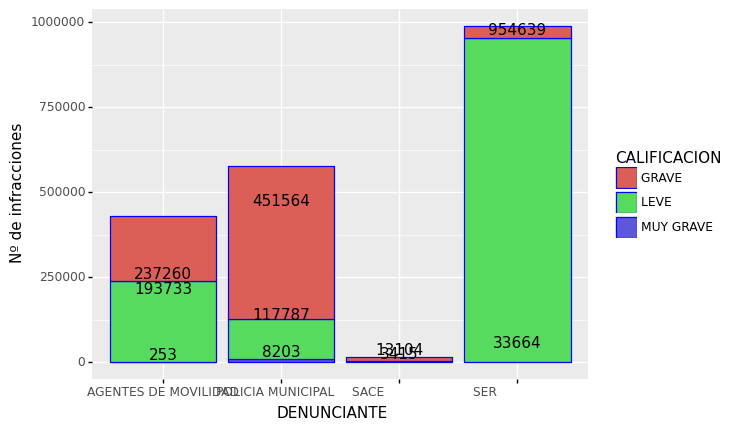

<ggplot: (179050403353)>

In [87]:
(ggplot(punto9,
        aes(x = "DENUNCIANTE", fill="CALIFICACION"))
                   + geom_bar(color = 'blue')
                   + geom_text (aes (label = after_stat("count")),
                    stat="count",
                    nudge_y=0.2,
                    va="bottom"))+ labs (y = "Nº de infracciones")

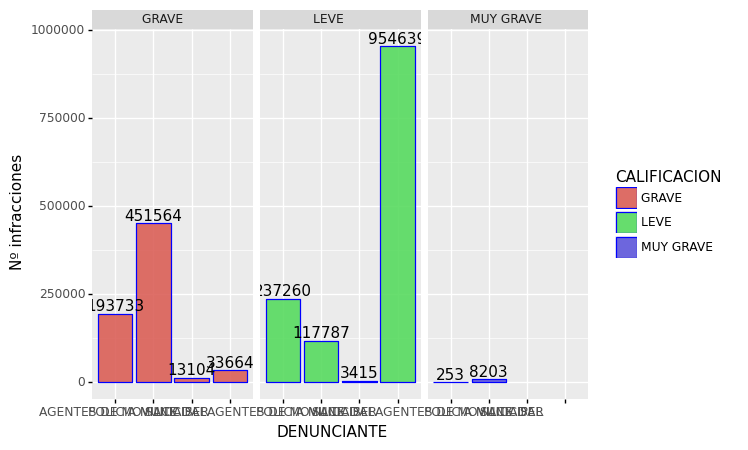

<ggplot: (179056903946)>

In [88]:
(ggplot(punto9,
        aes(x = "DENUNCIANTE", fill="CALIFICACION"))
                   + geom_bar(color = 'blue', alpha = 0.9)
                   + geom_text (aes (label = after_stat("count")),
                    stat="count",
                    nudge_y=0.2,
                    va="bottom")) + facet_wrap('~CALIFICACION', ncol =3)+ labs(y="Nº infracciones")
                    

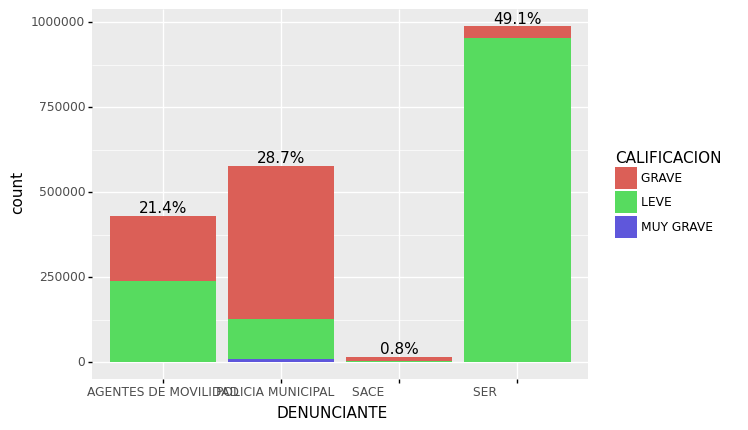

<ggplot: (179056995316)>

In [89]:
(ggplot(punto9,aes(x = "DENUNCIANTE", fill="CALIFICACION"))
                   + geom_bar()
                   + geom_text (aes (label = after_stat("prop*100"), group = 1),
                    stat="count",
                    nudge_y=0.125,
                    va="bottom",
                    format_string= "{:.1f}%"))

In [90]:
# Para cambiar el tamaño de letra en el eje x usaría theme, y pondrçia también orientación de títulos en vertical,
# pero me está dando error, lo dejo así. 